# 0.0 Imports

In [1]:
import pandas as pd
import inflection
import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import HTML

## 0.1 Loading data

In [2]:
df_sales_raw = pd.read_csv('dataset/train.csv', low_memory= False)
df_store_raw = pd.read_csv('dataset/store.csv', low_memory= False)


In [3]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Observamos que a coluna Store é comum nos dois dataset então vamos unir atráves dela, pois é uma chave 
estrageira

In [5]:
df_merge_raw=pd.merge(df_sales_raw, df_store_raw, how = 'left', on='Store')

In [6]:
# Obsevando como ficou
df_merge_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1. Helper Functions 

In [40]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [41]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 2.0 DESCRIÇÃO DOS DADOS

In [8]:
df_raw = df_merge_raw
df1 = df_raw.copy()

## 2.1 Rename Columns 

In [9]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [10]:
df1 = df_merge_raw

In [11]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map(snakecase, cols_old))

# Rename
df1.columns = cols_new

In [12]:
df_merge_raw.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 2.2 Data Dimensions

In [13]:
print( 'Number of Rows: {}'.format( df1.shape[0] ))

print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 2.3 Data Types

In [14]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 2.4 Check NA

In [15]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Três formas de lidar com null ou NaN
1. Deletar - (Caso tenha um conjunto grande de dados)
2. Substituir - ( Substitua os valores faltados pela média)
3. Acresente com conhecimento que tem do negócio

## 2.5 Fillout Nan ou NULL

In [16]:
precos = [100, 200, 300]
impostos = list(map(lambda x: x * 0.3, precos))
print(impostos)  # [30.0, 60.0, 90.0]


[30.0, 60.0, 90.0]


In [17]:
df1['competition_distance'].max()

75860.0

* competition_distance

            Vamos intepretar como a distânca sendo, quando é distância muito grande ou não tem concorrentes próximo.
            Vamos então substituir onde tem o Nan para - maior do que maior distância dos dados.
* competition_open_since_month

            Vamos refletir sobre a ausência de dados para a coluna que informa quando o competidor abriu as portas, 
            como:
*       Primeiro, ele é uma loja que está antes de nós!
*       Alguém esqueceu de anotar quando ela surgiu


* promo2_since_week 

            Ela informa a data da semana que a loja estava  na promo2, para informação está Nan, 
    *       Não estava em promo2
    *       Alguém esqueceu de colocar

In [18]:
#competition_distance 
df1['competition_distance']         = df1['competition_distance'].apply( lambda x: 200000 if math.isnan( x ) else x)

#competition_open_since_month 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)

#competition_open_since_year     
df1['competition_open_since_year']  = df1.apply(lambda x: x['date'].year if  math.isnan(x['competition_open_since_year'])  else x['competition_open_since_year'], axis = 1)

#promo2_since_week 
df1['promo2_since_week']            = df1.apply(lambda x: x['date'].week if  math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1)

#promo2_since_year              
df1['promo2_since_year']            = df1.apply(lambda x: x['date'].year if  math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis = 1)



In [19]:
#promo_interval     
month_map = {1 : 'Jan', 2 : 'Fev', 3 : 'Mar', 4 : 'Apr', 5 : 'May',
 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9: 'Sep', 10: 'Oct', 11 :'Nov', 12 : 'Dec'}  

df1['promo_interval'].fillna(0, inplace = True)

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] =df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1 ) # axis específica a direção
# df1['is_promo'] vai ser um ou zero depende da regra da function criada
#dtype: int64

C:\Users\Antonio Richard\AppData\Local\Temp\ipykernel_14964\3606421277.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['promo_interval'].fillna(0, inplace = True)


In [20]:
df1.sample(5).T

,386058,623175,760996,847973,713082
store,93,676,237,244,268
day_of_week,4,5,7,6,1
date,2014-07-24 00:00:00,2013-12-20 00:00:00,2013-08-18 00:00:00,2013-06-01 00:00:00,2013-09-30 00:00:00
sales,4770,8272,0,5315,5375
customers,493,1823,0,591,666
open,1,1,0,1,1
promo,0,1,0,0,0
state_holiday,0,0,0,0,0
school_holiday,1,0,0,0,0
store_type,a,b,a,d,a


In [21]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

# 2.6 Change Types

In [22]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [23]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year']  = df1['competition_open_since_year'].astype( int )
df1['promo2_since_week']  = df1['promo2_since_week'].astype( int )
df1['promo2_since_year']  = df1['promo2_since_year'].astype( int )

In [24]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 2.7 Descriptive Statistical 

In [25]:
num_atributes =  df1.select_dtypes( include = ['int32','int64', 'float64'] )
cat_atributes =  df1.select_dtypes( exclude = ['int32','int64', 'float64', 'datetime64[ns]'] )

In [26]:
num_atributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
191367,703,2,2583,346,1,0,0,80.0,6,2005,0,7,2015,0
236712,395,3,3398,438,1,0,1,3620.0,2,2013,0,1,2014,0


In [27]:
cat_atributes.dtypes

state_holiday     object
store_type        object
assortment        object
promo_interval    object
month_map         object
dtype: object

## 2.7.1 Numerical Atributes

In [28]:
# Central Tendency - Mean, median
ct1 = pd.DataFrame( num_atributes.apply( np.mean ) ).T

ct2 = pd.DataFrame( num_atributes.apply( np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_atributes.apply(np.std)).T
d2 = pd.DataFrame( num_atributes.apply(min)).T
d3 = pd.DataFrame( num_atributes.apply(max)).T
d4 = pd.DataFrame( num_atributes.apply( lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( num_atributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( num_atributes.apply( lambda x: x.kurtosis() )).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['atributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']



In [29]:
m

,atributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


O que é skew e Kurtosis ?

Claro! Vamos explorar esses conceitos:

1. **Assimetria (Skewness)**:
   - A **assimetria** mede o grau de inclinação de uma distribuição de dados.
   - Se a cauda da distribuição se estende mais para a direita, temos uma **assimetria positiva**.
   - Se a cauda se estende mais para a esquerda, temos uma **assimetria negativa**.
   - Uma distribuição normal perfeita tem assimetria igual a zero.
   - A assimetria influencia escolhas estatísticas e transformações de dados⁴.

2. **Curtose (Kurtosis)**:
   - A **curtose** está relacionada aos picos e caudas de uma distribuição.
   - Ela mede o quanto a distribuição é "pontuda" ou "achatada".
   - Existem três tipos de curtose:
     - **Mesocúrtica**: semelhante à distribuição normal.
     - **Leptocúrtica**: mais pontuda que a normal.
     - **Platicúrtica**: mais achatada que a normal.
   - A curtose padrão para uma distribuição normal é 3.
   - A curtose afeta a escolha de técnicas estatísticas e modelagem⁴.

Em resumo, a **assimetria** indica a inclinação dos dados, enquanto a **curtose** está relacionada aos picos e caudas da distribuição. Ambas são importantes para entender e modelar dados estatísticos. 😊



[(X) Ler!| () Lido](https://www.datacamp.com/pt/tutorial/understanding-skewness-and-kurtosis)

C:\Users\Antonio Richard\AppData\Local\Temp\ipykernel_14964\805656175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df1['sales']  )


<Axes: xlabel='sales', ylabel='Density'>

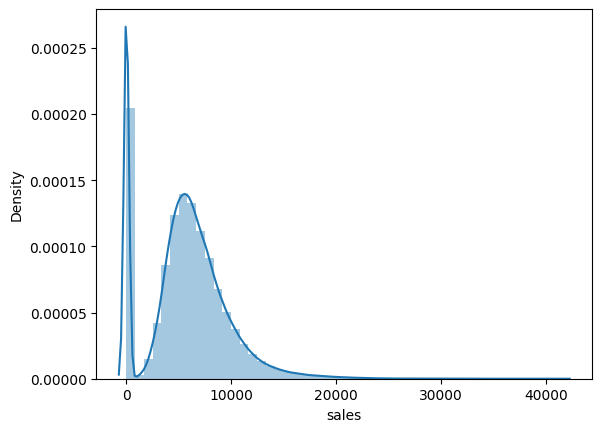

In [30]:
sns.distplot( df1['sales']  )

C:\Users\Antonio Richard\AppData\Local\Temp\ipykernel_14964\1008111048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df1['competition_distance']  )


<Axes: xlabel='competition_distance', ylabel='Density'>

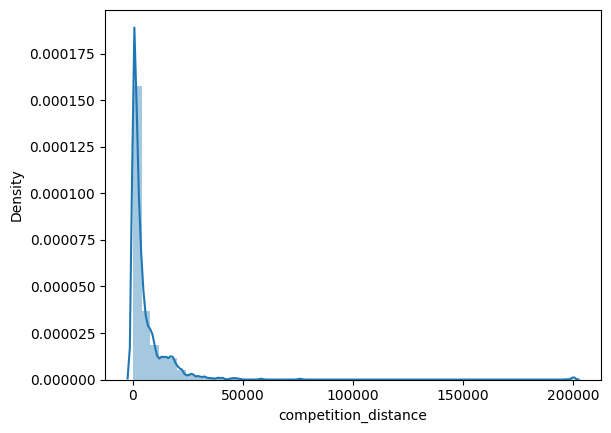

In [31]:
sns.distplot( df1['competition_distance']  )

## 2.7.2 Categorical Atributos

In [32]:
cat_atributes.apply( lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='state_holiday', ylabel='sales'>

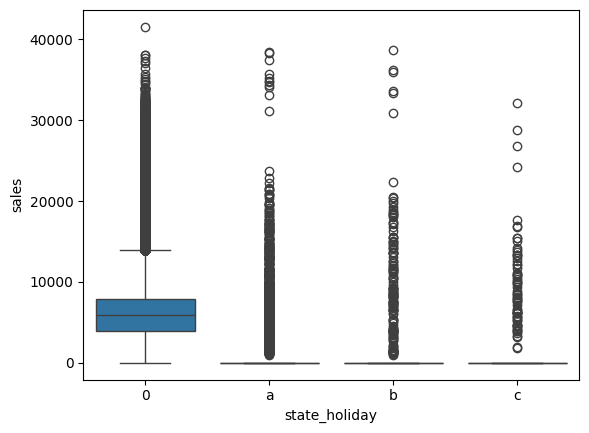

In [33]:
sns.boxplot(x = 'state_holiday', y='sales' , data=df1)

<Axes: xlabel='assortment', ylabel='sales'>

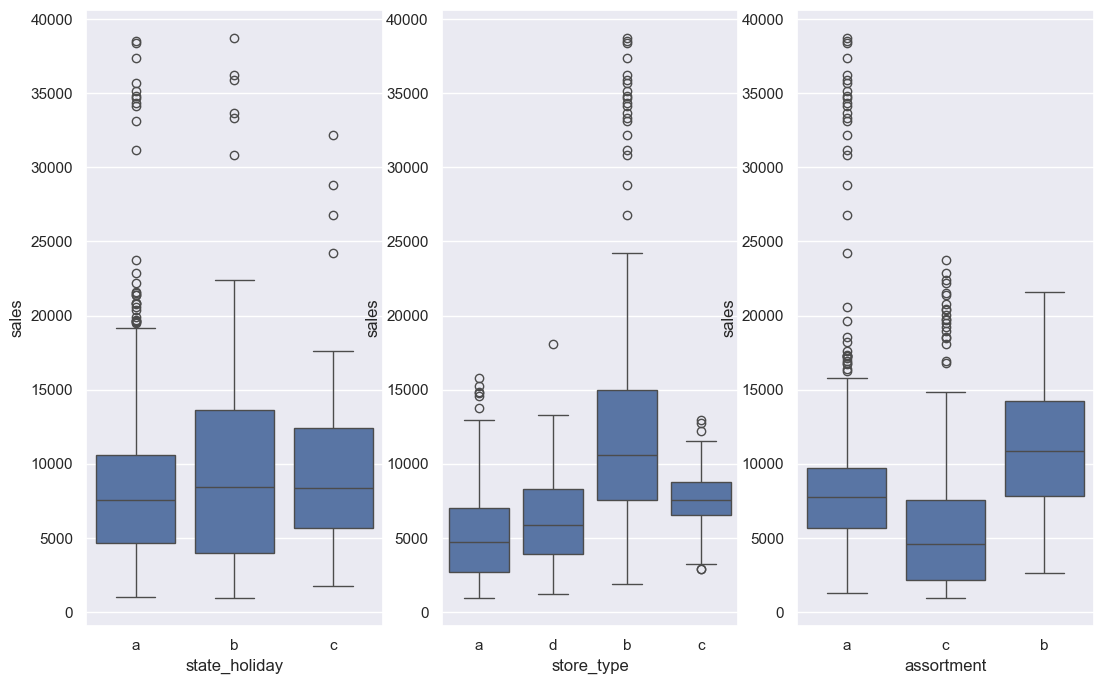

In [43]:
# melhorando a visualização removedo dias que não vendeu
aux1 = df1[ (df1['state_holiday'] != '0' ) & ( df1['sales']> 0 ) ]
plt.figure(figsize=(13, 8))

plt.subplot(1, 3, 1 )
sns.boxplot(x = 'state_holiday', y='sales' , data=aux1)


plt.subplot(1, 3, 2 )
sns.boxplot(x = 'store_type', y='sales' , data=aux1)


plt.subplot(1, 3, 3 )
sns.boxplot(x = 'assortment', y='sales' , data=aux1)




C:\Users\Antonio Richard\AppData\Local\Temp\ipykernel_14964\1564425105.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state_holiday', y='sales', data=aux1, palette=colors_state_holiday)


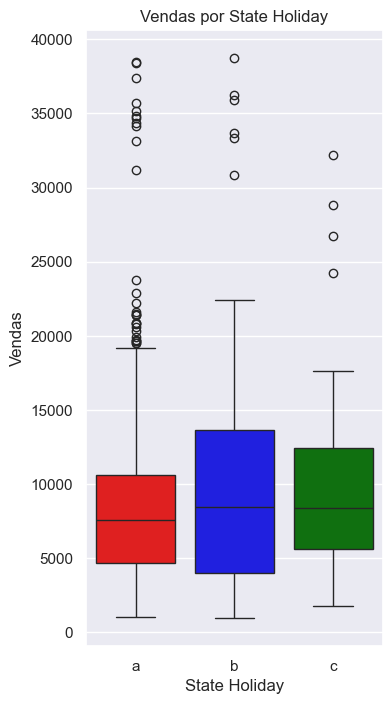

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dados de exemplo
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.figure(figsize=(13, 8))

# Defina as cores para cada categoria
colors_state_holiday = {'a': 'red', 'b': 'blue', 'c': 'green', 'd': 'purple'}

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1, palette=colors_state_holiday)
plt.title('Vendas por State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Vendas')

plt.show()


C:\Users\Antonio Richard\AppData\Local\Temp\ipykernel_14964\1552107637.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='store_type', y='sales', data=aux1, palette=colors_store_type)


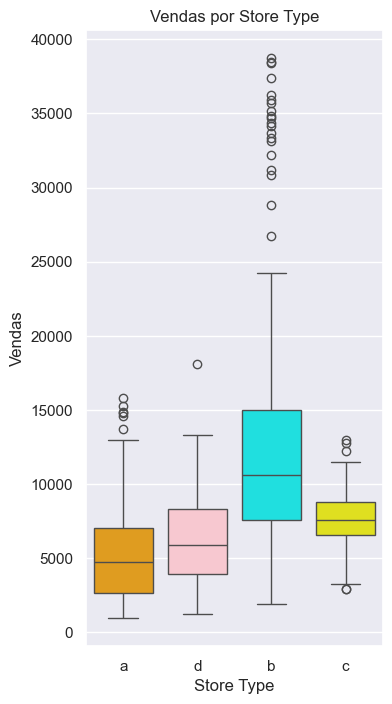

In [45]:
# Defina as cores para cada categoria
colors_store_type = {'a': 'orange', 'b': 'cyan', 'c': 'yellow', 'd': 'pink'}

plt.figure(figsize=(13, 8))

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1, palette=colors_store_type)
plt.title('Vendas por Store Type')
plt.xlabel('Store Type')
plt.ylabel('Vendas')

plt.show()


C:\Users\Antonio Richard\AppData\Local\Temp\ipykernel_14964\3687391590.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='assortment', y='sales', data=aux1, palette=colors_assortment)


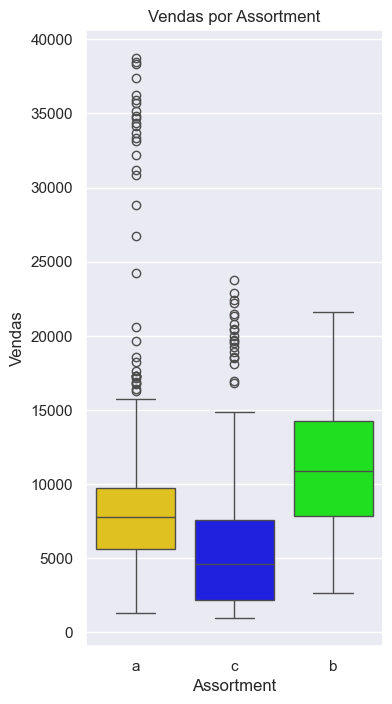

In [46]:
# Defina as cores para cada categoria
colors_assortment = {'a': 'gold', 'b': 'lime', 'c': 'blue'}

plt.figure(figsize=(13, 8))

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1, palette=colors_assortment)
plt.title('Vendas por Assortment')
plt.xlabel('Assortment')
plt.ylabel('Vendas')

plt.show()


Como funciona boxplot 
qual é a regra para outilier